# Get forecast for a specific spot

In [29]:
%load_ext autoreload
%autoreload 2
import requests
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import datetime
import pandas as pd

from pysurfline import SpotForecast,URLBuilder

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
u=URLBuilder("wave",{"spotId":"584204204e65fad6a7709b09"})
r = requests.get(u.url)
r.status_code

200

In [31]:
f=SpotForecast(r.json())

In [32]:
f.location

{'lon': 8.577, 'lat': 44.358}

In [33]:
waves=f.get_dataframe("wave")
waves.head()

,timestamp,utcOffset,surf_min,surf_max,surf_optimalScore,swells
0,2022-02-13 00:00:00,1,0.0,0.16,0,"[{'height': 0.89362, 'period': 4, 'direction':..."
1,2022-02-13 01:00:00,1,0.0,0.16,0,"[{'height': 0.81617, 'period': 4, 'direction':..."
2,2022-02-13 02:00:00,1,0.0,0.16,0,"[{'height': 0.76001, 'period': 4, 'direction':..."
3,2022-02-13 03:00:00,1,0.0,0.18,0,"[{'height': 0.69152, 'period': 4, 'direction':..."
4,2022-02-13 04:00:00,1,0.0,0.20,0,"[{'height': 0.62422, 'period': 4, 'direction':..."


In [34]:
surf=waves.copy()[["timestamp","surf_min",	"surf_max"]]
surf["timestamp"]=pd.to_datetime(surf["timestamp"])
surf=surf.set_index("timestamp")
surf=surf.resample("3H").mean()

days=7
surf=surf.loc[:surf.index[0]+datetime.timedelta(days=7)]
surf.head()

,surf_min,surf_max
timestamp,,
2022-02-13 00:00:00,0.0,0.160000
2022-02-13 03:00:00,0.0,0.193333
2022-02-13 06:00:00,0.0,0.190000
2022-02-13 09:00:00,0.0,0.166667
2022-02-13 12:00:00,0.0,0.143333


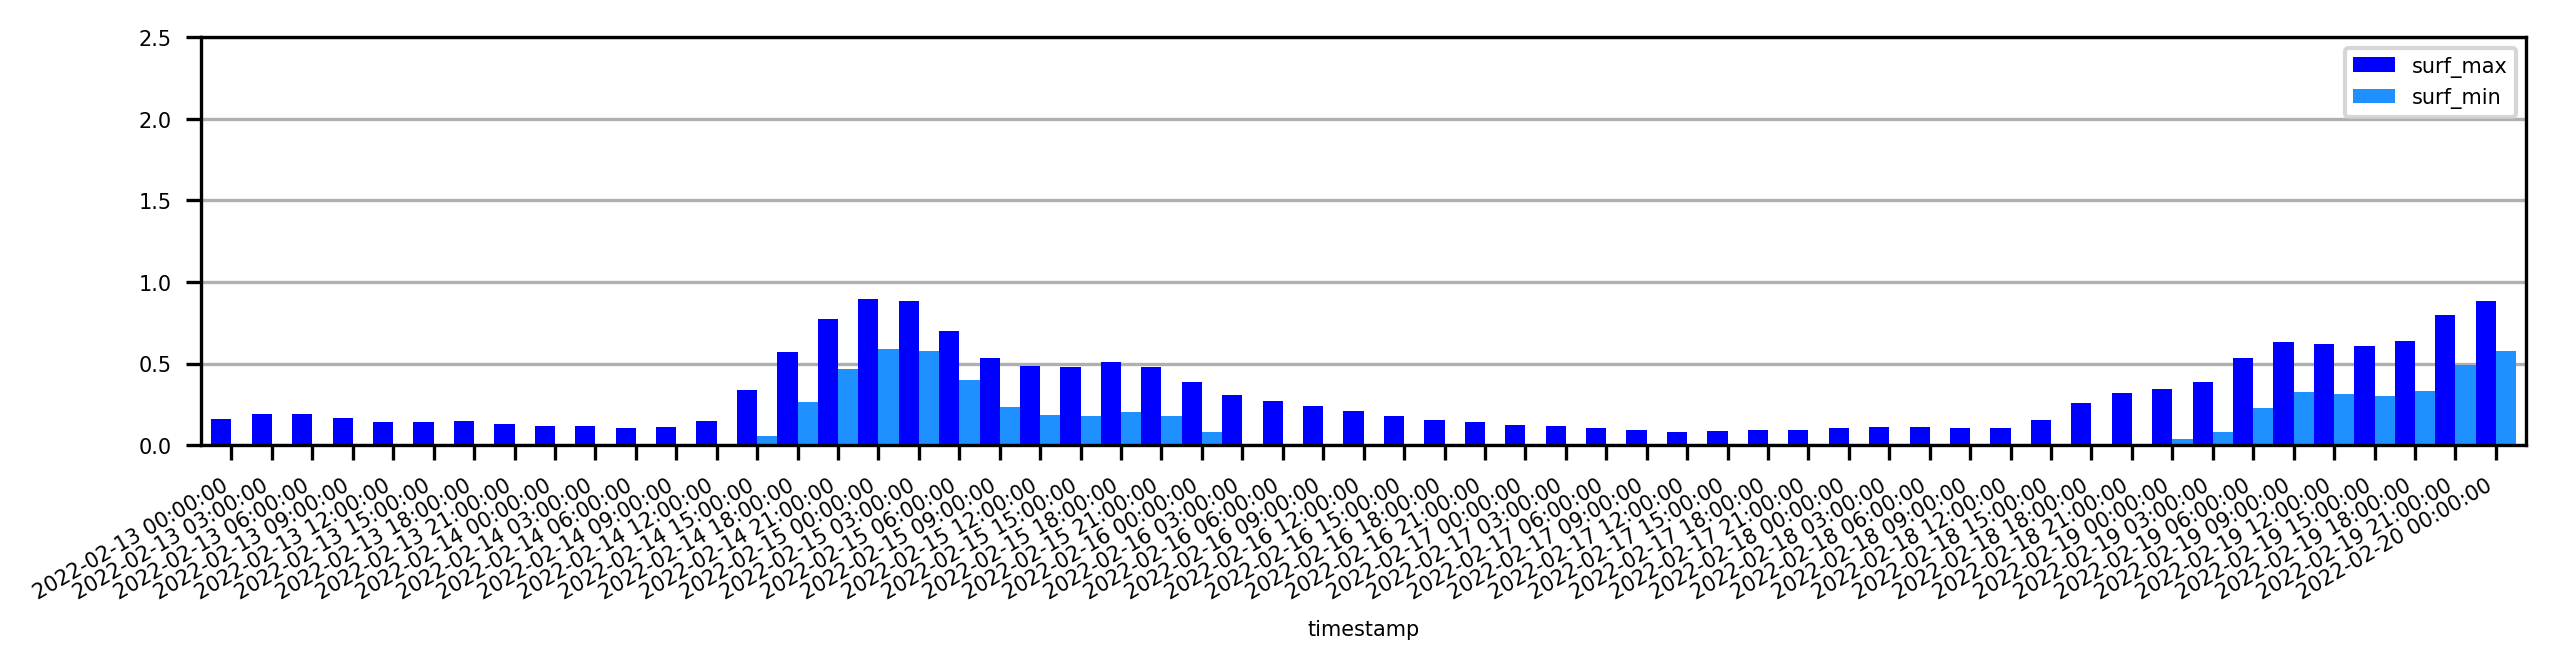

In [35]:
matplotlib.rcParams.update({'font.size': 5})
f,ax=plt.subplots(figsize=(10,2),dpi=300)
ax.xaxis.set_major_formatter("%d-%b")

surf.plot.bar(y=["surf_max","surf_min"],color=["blue","dodgerblue"],ax=ax,zorder=2,width=1)
ax.set_ylim([0,2.5])
ax.grid(axis="y",zorder=0)
ax.figure.autofmt_xdate()
# date_fmt = '%d-%b %H'
# years = mdates.DayLocator()   # every year
# # yearsFmt = mdates.DateFormatter(date_fmt)

# ax.xaxis.set_major_locator(years)
# ax.xaxis.set_major_formatter(yearsFmt)
